In [0]:
#Setup
import pandas as pd
import math
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Importing the latest data from Kaggle
!pip install kaggle
!mkdir .kaggle
import json
token= {"username":"umatv1699","key":"abec8bf1b9079189558a1524b4ea75e4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sudalairajkumar/covid19-in-india -p/content
!unzip \*.zip

HospitalBedsIndia_url="HospitalBedsIndia.csv"
HospitalBedsIndia=pd.read_csv(HospitalBedsIndia_url)
ICMRTestingDetails_url="ICMRTestingDetails.csv"
ICMRTestingDetails=pd.read_csv(ICMRTestingDetails_url, dayfirst=True, parse_dates=["DateTime"])

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
covid19-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid19-in-india.zip
replace AgeGroupDetails.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [0]:
#Importing the data shared with us along with the project problem statement
#To use the data given to us instead of the latest data, uncomment this block and comment the previous Kaggle Block of Code
"""
HospitalBedsIndia_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/HospitalBedsIndia.csv"
HospitalBedsIndia=pd.read_csv(HospitalBedsIndia_url)
ICMRTestingDetails_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/ICMRTestingDetails.csv"
ICMRTestingDetails=pd.read_csv(ICMRTestingDetails_url, dayfirst=True, parse_dates=["Date"])
"""

'\nHospitalBedsIndia_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/HospitalBedsIndia.csv"\nHospitalBedsIndia=pd.read_csv(HospitalBedsIndia_url)\nICMRTestingDetails_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/ICMRTestingDetails.csv"\nICMRTestingDetails=pd.read_csv(ICMRTestingDetails_url, dayfirst=True, parse_dates=["Date"])\n'

In [0]:
HospitalBedsIndia.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [0]:
ICMRTestingDetails.tail()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases
37,38,2020-04-23 09:00:00,541789.0,525667.0,23502.0
38,39,2020-04-24 09:00:00,579957.0,NaN,NaN
39,40,2020-04-25 09:00:00,625309.0,NaN,NaN
40,41,2020-04-26 09:00:00,665819.0,NaN,NaN
41,42,2020-04-27 09:00:00,716733.0,NaN,NaN


In [0]:
#Correlation factor of no. of cases to no. of tests
total_tests=ICMRTestingDetails.TotalSamplesTested.sum()
total_positives=ICMRTestingDetails.TotalPositiveCases.sum()
ratio=total_positives/total_tests
ratio

0.024905199407791716

In [0]:
#Computing additional no. of labs required
extra_labs=[]
for i in range(10):
  #No. of confirmed cases as of on 10/4/2020 = 6761 from covid_19_india.csv
  cases = 6761*(1.1**(i+1))
  diff_cases = cases-6761
  tests = diff_cases/ratio
  labs = math.ceil(tests/100)
  date = str(i+11)+'/04/2020'
  extra_labs.append([date,labs+math.ceil(6761/ratio/100),labs])
required_labs = pd.DataFrame(extra_labs, columns = ['Date' , 'total_labs', 'additional_labs'])
required_labs

,Date,total_labs,additional_labs
0,11/04/2020,2987,272
1,12/04/2020,3286,571
2,13/04/2020,3614,899
3,14/04/2020,3975,1260
4,15/04/2020,4373,1658
5,16/04/2020,4810,2095
6,17/04/2020,5291,2576
7,18/04/2020,5820,3105
8,19/04/2020,6402,3687
9,20/04/2020,7042,4327


Text(0, 0.5, 'Total no. of labs')

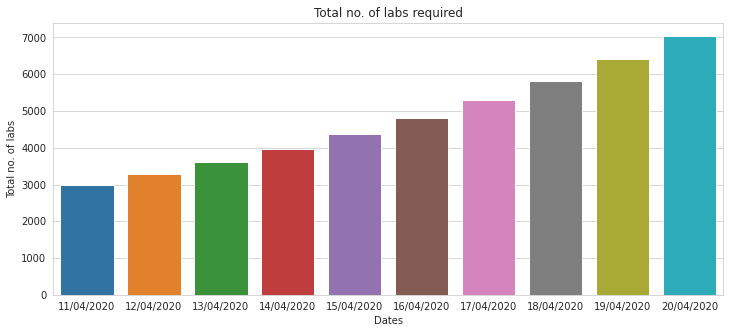

In [0]:
#Displaying total no. labs required
sns.set_style("whitegrid")
fig2, ax2 = plt.subplots(figsize = (12,5))  
sns.barplot(y="total_labs", x="Date", data=required_labs)
plt.title("Total no. of labs required")
plt.xlabel("Dates")
plt.ylabel("Total no. of labs")

Text(0, 0.5, 'Additional no. of labs')

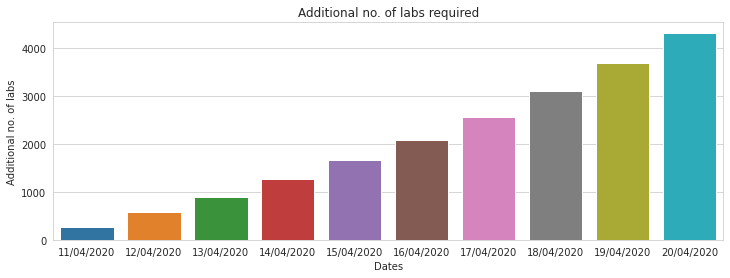

In [0]:
#Displaying additional no. labs required
sns.set_style("whitegrid")
fig2, ax2 = plt.subplots(figsize = (12,4))  
sns.barplot(y="additional_labs", x="Date", data=required_labs)
plt.title("Additional no. of labs required")
plt.xlabel("Dates")
plt.ylabel("Additional no. of labs")